Dataset: [sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [80]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import os


In [81]:

# columns
# Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder

file_name = "./Sleep_health_and_lifestyle_dataset.csv"
train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Blood Pressure","Heart Rate","Daily Steps"]
target_column = "Sleep Disorder"

df = pd.read_csv(file_name)
print(df.columns.tolist())

X = df[train_columns]
y = df[target_column]
df.head(15)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [82]:
import pandas as pd
import numpy as np

def convert_to_categories(train_df, conv_num_column = False):
    df_cat = train_df.copy()

    if conv_num_column:

        # Age (27-59 years)
        df_cat['Age'] = pd.cut(df_cat['Age'], bins=[0, 35, 45, 60], labels=[0, 1, 2])

        # Sleep Duration (5.8-8.5 hours)
        df_cat['Sleep Duration'] = pd.cut(df_cat['Sleep Duration'], bins=[0, 6, 7.5, 9], labels=[0, 1, 2])

        # Quality of Sleep (4-9 points)
        df_cat['Quality of Sleep'] = pd.cut(df_cat['Quality of Sleep'], bins=[0, 5, 7, 10], labels=[0, 1, 2])

        # Physical Activity Level (30-90 minutes)
        df_cat['Physical Activity Level'] = pd.cut(df_cat['Physical Activity Level'], bins=[0, 45, 75, 100], labels=[0, 1, 2])

        # Stress Level (3-8 points)
        df_cat['Stress Level'] = pd.cut(df_cat['Stress Level'], bins=[0, 4, 6, 10], labels=[0, 1, 2])

        # Heart Rate (65-86 beats/min)
        df_cat['Heart Rate'] = pd.cut(df_cat['Heart Rate'], bins=[0, 70, 80, 200], labels=[0, 1, 2])

        # Daily Steps (3000-10000 steps)
        df_cat['Daily Steps'] = pd.cut(df_cat['Daily Steps'], bins=[0, 5000, 7500, 15000], labels=[0, 1, 2])


    df_cat[['Systolic BP', 'Diastolic BP']] = df_cat['Blood Pressure'].str.split('/', expand=True).astype(float)
    df_cat = df_cat.drop(columns=['Blood Pressure'])

    Gender_mapping = {'Male': 1, 'Female': 0}
    df_cat['Gender'] = train_df['Gender'].map(Gender_mapping)

    # Occupation_mapping = {'Doctor':'醫生','Nurse':'護士', 'Engineer':'工程師','Software Engineer':'軟體工程師', 'Teacher':'老師', 'Sales Representative':'銷售','Accountant':'會計', 'Scientist':'科學家'}
    # df_cat['職業'] = train_df['Occupation'].map(Occupation_mapping)

    BMI_Category_mapping = {'Normal': 0, 'Normal Weight': 1,'Overweight': 2,'Obese': 3}
    df_cat['BMI Category'] = train_df['BMI Category'].map(BMI_Category_mapping)

    sleep_disorder_mapping = {'Sleep Apnea': 1, 'Insomnia': 2}
    df_cat['Sleep Disorder'] = train_df['Sleep Disorder'].map(sleep_disorder_mapping).fillna(0)
    return df_cat


In [83]:
df = convert_to_categories(df)

df = df.drop("Occupation", axis=1)

train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Heart Rate","Daily Steps", 'Systolic BP', 'Diastolic BP']

X = df[train_columns]
y = df[target_column]
df.head(15)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,6.1,6,42,6,2,77,4200,0.0,126.0,83.0
1,2,1,28,6.2,6,60,8,0,75,10000,0.0,125.0,80.0
2,3,1,28,6.2,6,60,8,0,75,10000,0.0,125.0,80.0
3,4,1,28,5.9,4,30,8,3,85,3000,1.0,140.0,90.0
4,5,1,28,5.9,4,30,8,3,85,3000,1.0,140.0,90.0
5,6,1,28,5.9,4,30,8,3,85,3000,2.0,140.0,90.0
6,7,1,29,6.3,6,40,7,3,82,3500,2.0,140.0,90.0
7,8,1,29,7.8,7,75,6,0,70,8000,0.0,120.0,80.0
8,9,1,29,7.8,7,75,6,0,70,8000,0.0,120.0,80.0
9,10,1,29,7.8,7,75,6,0,70,8000,0.0,120.0,80.0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

df_train_std = pd.DataFrame(X_train_std[:5], columns = train_columns)
df_train_std




,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
0,1.044466,0.055811,-0.833457,-1.155098,-0.728644,0.956601,1.078311,0.481081,-0.554643,0.186918,0.050678
1,1.044466,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,-0.930505,0.481081,-1.180447,-0.448177,-0.746830
2,1.044466,-0.877751,0.436694,0.537913,-0.006920,-0.176166,0.073903,-0.014076,0.696966,-1.083272,-0.746830
3,-0.957427,1.922934,1.325801,1.384419,0.714805,-1.308933,1.078311,-0.509234,0.071162,1.457107,1.645692
4,-0.957427,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,0.073903,2.461710,-1.806251,0.440955,0.369681


In [85]:
# Radial Basis Function Kernel
svm = SVC(kernel = 'rbf', C = 1.0, random_state = 42)
svm.fit(X_train_std, y_train)

sbs = SFS(svm, k_features = 2, forward = True, verbose = 2, scoring = 'accuracy', cv = 4)
sbs.fit(X_train_std, y_train)

selected_features = list(sbs.k_feature_idx_)
print(selected_features)

y_pred = svm.predict(X_test_std)
# sbs acc
print(accuracy_score(y_test, y_pred))


[5, 9]
0.8933333333333333



[2024-12-20 19:53:25] Features: 1/2 -- score: 0.8093243243243243
[2024-12-20 19:53:25] Features: 2/2 -- score: 0.9130180180180181

[5, 9]


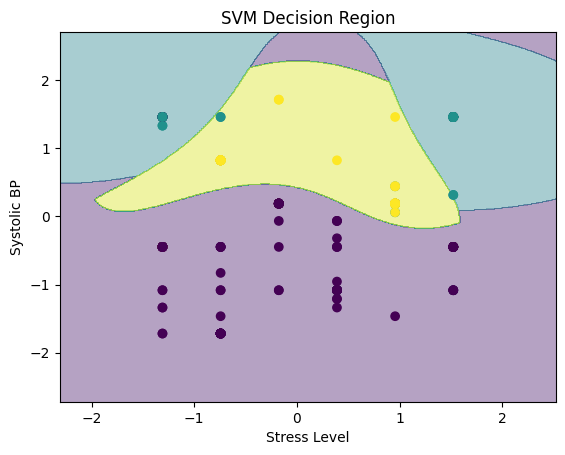

In [86]:

f1, f2 = selected_features
svm.fit(X_train_std[:, selected_features], y_train)
print(selected_features)

x_min, x_max = X_train_std[: , f1].min() - 1, X_train_std[: , f1].max() + 1
y_min, y_max = X_train_std[: , f2].min() - 1, X_train_std[: , f2].max() + 1


# print(x_min, x_max)
# print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.4, cmap = 'viridis')
plt.scatter(X_train_std[:, f1], X_train_std[:, f2], c = y_train, cmap = 'viridis')
plt.xlabel(train_columns[f1])
plt.ylabel(train_columns[f2])
plt.title("SVM Decision Region")
plt.show()


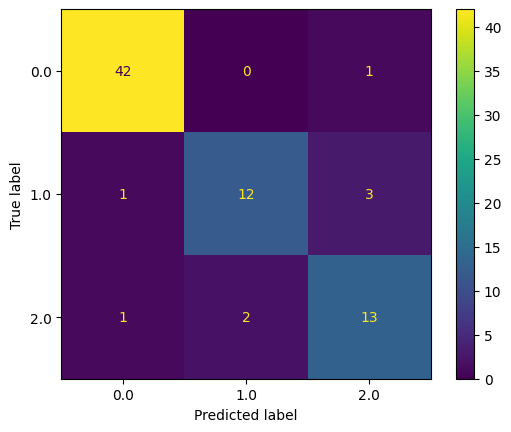

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()



In [88]:

print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
print(f"Precision Score: {round(precision_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"Recall Score: {round(recall_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred, average = 'macro')*100, 2)}%")



Accuracy Score: 89.33%
Precision Score: 85.88%
Recall Score: 84.64%
F1 Score: 85.11%
